# Car-Bike classification

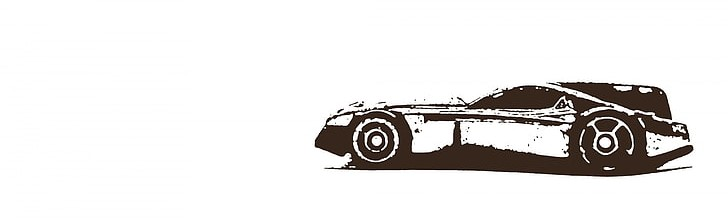

# 

### importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm #For using tqdm we need maximum python version of 3.10.9 , in python 3.11 we can't able to use tqdm
import random
from sklearn.model_selection import train_test_split
from sklearn. pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten

# 

### Importing Data

In [2]:
DATADIR = "Car-Bike-Dataset"#need to mention the path of Car-Bike-Dataset folder,
                            #for me both jupyter file and Car-Bike-Dataset are in same folder
                            #so i doesn't require to mention full path

CATEGORIES = ["Bike", "Car"]

IMG_SIZE = 200

# 

### Creating a class for converting images to numerical data and labelling

In [3]:
training_data = []
class create_training_data (BaseEstimator, TransformerMixin) :
    def fit (self, X, y=None) :
        return self

    def transform (self, X) :
        for category in CATEGORIES: 

            path = os.path.join(DATADIR,category)  
            class_num = CATEGORIES.index(category)  
            for img in tqdm(os.listdir(path)): 
                try:
                    img_array = cv2.imread(os.path.join(path,img))
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                    training_data.append([new_array, class_num]) 
                except Exception as e:
                    pass
        return training_data
                
    


# 

### Creating a class for Reshaping and splitting a data

In [4]:
class X_Y(BaseEstimator, TransformerMixin) :
    def fit (self, x, y=None) :
        return self

    def transform (self, x) :
        X = []
        Y = []
        for features,label in x:
            X.append(np.array(features).reshape(-1, IMG_SIZE, IMG_SIZE, 3))
            Y.append(np.array(label))    
        X= np.array(X).reshape(len(X), IMG_SIZE, IMG_SIZE, 3)
        Y=np.array(Y)
        X=X/255.0
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20,shuffle=True)
        return X_train, X_test, Y_train, Y_test
    

# 

### Creating a pipeline For preprocessing 

In [5]:
preprocessing = Pipeline([
    ("create_training_data", create_training_data()),
    ("X_Y ",X_Y())
])

In [6]:
X_train, X_test, Y_train, Y_test=preprocessing.fit_transform(DATADIR)

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 675.13it/s]


# 

### Creating a Model and Fitting 

In [7]:
model = Sequential()

model.add(Conv2D(256, (3,3), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add (Flatten())
model.add(Dense(64))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
        
model.fit(X_train,Y_train,batch_size=32,epochs=3)

Epoch 1/3
100/100 [==============================] - 465s 5s/step - loss: 0.7915 - accuracy: 0.7822
Epoch 2/3
100/100 [==============================] - 442s 4s/step - loss: 0.2211 - accuracy: 0.9166
Epoch 3/3
100/100 [==============================] - 446s 4s/step - loss: 0.0995 - accuracy: 0.9641


# 

###  Evaluation 

In [8]:
model.evaluate(X_test,Y_test)

25/25 [==============================] - 28s 1s/step - loss: 0.2494 - accuracy: 0.9162


[0.24936698377132416, 0.9162499904632568]

# 

### Testing 

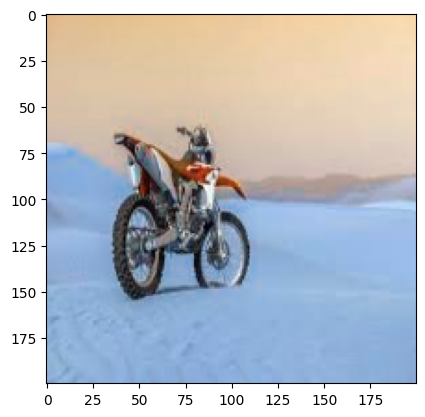

1/1 [==============================] - 0s 146ms/step



Our model says it is a : Bike


In [9]:
idx2 = random. randint(0, len (Y_test))
plt.imshow(X_test[idx2, :])
plt.show()
y_pred = model.predict(X_test[idx2,:].reshape(-1, IMG_SIZE, IMG_SIZE, 3))
y_pred = y_pred > 0.5
if (y_pred == 0):
    pred = 'Bike'
else:
     pred = 'car'
        
print("""


Our model says it is a :""", pred)

# 

# 

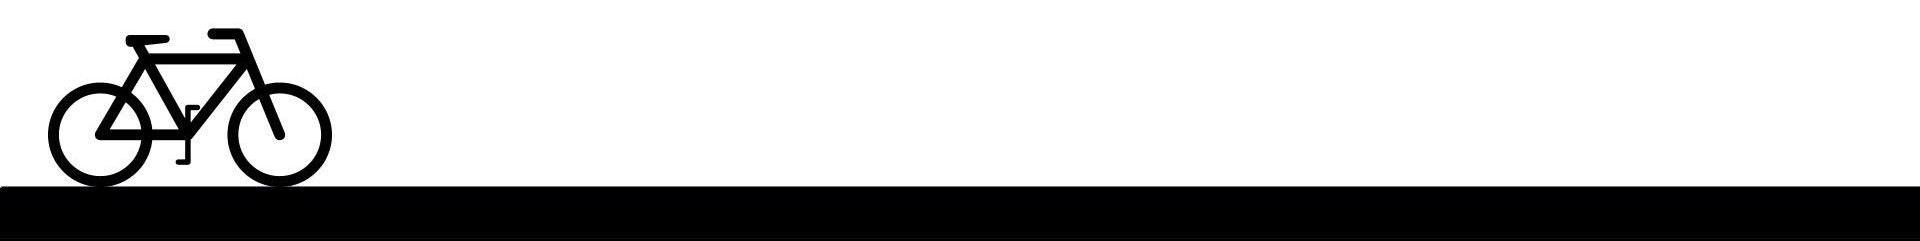

# 